<a href="https://colab.research.google.com/github/Amitparikh1/CADS_StatisticalTestingWorkshop/blob/main/CADS_Statistical_Testing_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import scipy.stats as stats
import statsmodels.stats.proportion as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


One Sample T-Test

In [ ]:
## Create the Data Table
average, std = 72, 5 # mean and standard deviation
generated_class_scores = np.round(np.random.normal(average, std, 1000))
class_df = pd.DataFrame(generated_class_scores,columns=['Score'])
# take a random sample of 30 students
sample_df = class_df.sample(30)
sample_df.head()

,Score
48,71.0
394,71.0
391,68.0
80,70.0
212,71.0


Ttest_1sampResult(statistic=2.4523512714820708, pvalue=0.02044828890851184)


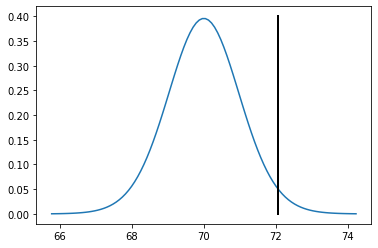

In [ ]:
## Scenario - A principal claims that students at his school are above average test takers. 
#             From a random sample of 30 of the 1000 students at the school, find if there is sufficient evidence to suppor the principals claim
#             The nationwide average on the test is 70, the standard deviation is unknown.
#             Null Hypothesis - average score at the school = 70. Alternate Hypothesis - average score at the school > 70
#             We're using a t-test because we know the population mean, but not the population standard deviation and we are trying to find the significance of the mean of one statistic. 

## Parameters: sample observation, and population mean, can also specify if you want a one sided test and which side (default is two sided)
t_test_result = stats.ttest_1samp(sample_df['Score'],70) 
print(t_test_result)

# Plot
rv = stats.t(df=len(sample_df), loc=70, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 
plt.plot(x,y)
# add line to show sample mean
plt.plot([sample_df['Score'].mean(), sample_df['Score'].mean()], [0, .4], 'k-', lw=2)
plt.show()

Z-Test for Proportions

In [ ]:
## Scenario - You think that students at a highschool of 2000 students are split 50/50 on liking Duke or UNC. To test this you ask a random sample of 100 students.
#             Null Hypothesis - The proportion of students that like UNC is .5
#             Alternate Hypothesis - The proportion of students that like UNC is not .5 (UNC, Duke Split is not 50/50)
#             Here we use a z-test for proportions because we're looking at the proportion of students, not the mean of a measure. 

num_of_unc_fans = random.randint(1,100)
# Parameters: count of 'successes', number of samples, null hypothesis proportion, 'smaller', 'larger', or 'two-sided' 
z_test_result = sm.proportions_ztest(count = num_of_unc_fans,nobs=100,value=.5,alternative="two-sided") 
print(str(num_of_unc_fans) + "% of the sample are UNC fans")
print("Z Statistic: " + str(z_test_result[0]))
print("P Value: " + str(z_test_result[1]))

3% of the sample are UNC fans
Z Statistic: -27.55188794274581
P Value: 4.2007810983124646e-167


Chi-Square Test

In [ ]:
## Create the Data Table

sample_dict = {"A":0,"B":0,"C":0,"D":0}
for i in range(100):
  answer = random.choice(list(sample_dict.keys()))
  sample_dict[answer] += 1 
print(sample_dict)

{'A': 22, 'B': 27, 'C': 24, 'D': 27}


In [ ]:
## Scenario - Your teacher claims that each of four multiple choice options has an equal chance of being selected on your Final Exam.
#             You decide to do a Chi-Square Test to see if this is the case by using a random sample of 100 multiple choice problems.
#             Null Hypothesis - all answer choices have an equal probability of being chosen.
#             Alternate Hypothesis - all answer choices DO NOT have an equal probability of being chosen
#             Here we use a chi-square test because our data is categorical (there are counts for each category)
 
# Parameters: observed frequencies, expected frequencies in each category 
chi_square_result = stats.chisquare(f_obs = list(sample_dict.values()),f_exp = [25,25,25,25])
print(chi_square_result)
if chi_square_result[1]<.05:
  print("Null hypothesis rejected")
else:
  print("Fail to reject the null hypothesis")

Power_divergenceResult(statistic=0.7200000000000001, pvalue=0.8684899681806464)
Fail to reject the null hypothesis


ANOVA Test

In [ ]:
## Read in the Data
oreo_ratings = pd.read_csv("https://raw.githubusercontent.com/Amitparikh1/CADS_StatisticalTestingWorkshop/main/oreo_rankings.csv")

oreo_ratings = oreo_ratings.transpose()
oreo_ratings = oreo_ratings.rename(columns=oreo_ratings.iloc[0])
oreo_ratings = oreo_ratings.reset_index()
oreo_ratings = oreo_ratings.drop([0,7])
oreo_ratings = oreo_ratings[['chocolate','double stuf','mint','red velvet']]
oreo_ratings.head(6)

,chocolate,double stuf,mint,red velvet
1,3.5,3.5,3.5,4
2,3,4,4,3
3,3.5,3,4.5,4.5
4,3,3,4,4
5,4,3.5,4.25,2.5
6,3.4,3.4,4.05,3.6


In [ ]:
## Scenario - We are looking at a sample of taste ratings for different Oreo flavors. 1 is the lowest rating and 5 is the highest rating. 
#             Null Hypothesis - There IS NO difference in the population mean taste rating for the oreo flavors  
#             Alternate Hypothesis - There IS a difference in the population mean taste rating for the oreo flavors
#             Here we use an ANOVA test because we are looking at more than 2 groups. 

# Parameters: sample measurements from each group
anova_result = stats.f_oneway(oreo_ratings['chocolate'],oreo_ratings['double stuf'],oreo_ratings['mint'],oreo_ratings['red velvet'])
print(anova_result)

F_onewayResult(statistic=2.424731182795699, pvalue=0.0956802283917702)
